## Import torch library

In [1]:
import torch

In [2]:
torch.__version__

'2.2.1+cu121'

## check if GPU is available

In [3]:
!nvidia-smi

Fri May  3 06:45:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Device agnostic code

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Creating tensors

In [6]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [8]:
scalar.ndim

0

In [10]:
vector = torch.tensor([1, 3, 4])
vector, vector.ndim

(tensor([1, 3, 4]), 1)

In [11]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]])
TENSOR.ndim

3

## Random tensors

In [14]:
tensor = torch.rand(size=(3, 4))
tensor, tensor.shape, tensor.dtype

(tensor([[0.0489, 0.3349, 0.7427, 0.3740],
         [0.2436, 0.9848, 0.8119, 0.6525],
         [0.6215, 0.4309, 0.4967, 0.2100]]),
 torch.Size([3, 4]),
 torch.float32)

## Zeroes and ones

In [15]:
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [16]:
randn_tensor = torch.randn(size=(3, 3))
randn_tensor

tensor([[ 0.9250,  0.2486,  0.3672],
        [-3.0637,  1.1296,  0.5437],
        [-1.6174, -1.3781,  0.5513]])

In [17]:
torch.maximum(randn_tensor, torch.zeros_like(randn_tensor))

tensor([[0.9250, 0.2486, 0.3672],
        [0.0000, 1.1296, 0.5437],
        [0.0000, 0.0000, 0.5513]])

In [19]:
torch.ones(size=(4,4)).dtype

torch.float32

## Creating range and tensors like

In [20]:
range_tensor = torch.arange(start=0, end=10, step=1)
range_tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Tensor datatypes

In [21]:
range_tensor.dtype

torch.int64

## Getting information from tensors

In [22]:
rand_tensor = torch.rand(size=(3, 4))

print(rand_tensor)
print("data type of tensor:", rand_tensor.dtype)
print("Storage device:", rand_tensor.device)
print("shape of the tensor:", rand_tensor.shape)

tensor([[0.4768, 0.5323, 0.9139, 0.5661],
        [0.4321, 0.0685, 0.0331, 0.1416],
        [0.9841, 0.0154, 0.6706, 0.4173]])
data type of tensor torch.float32
Storage device cpu
shape of the tensor torch.Size([3, 4])


# Manipulating tensors (tensor operations)



In [23]:
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [24]:
print(tensor + 10)
print(tensor - 10)
print(tensor / 10)

tensor([11, 12, 13])
tensor([-9, -8, -7])
tensor([0.1000, 0.2000, 0.3000])


In [26]:
tensor1 = torch.tensor([4, 5, 6])
tensor + tensor1

tensor([5, 7, 9])

In [27]:
tensor * tensor1

tensor([ 4, 10, 18])

In [29]:
Tensor1 = torch.tensor([[1, 2, 3],
                        [4, 5, 6]])
Tensor2 = torch.tensor([[1, 3, 4],
                        [7, 5, 2]])
print(Tensor1.shape, Tensor2.T.shape)
torch.matmul(Tensor1, Tensor2.T)

torch.Size([2, 3]) torch.Size([3, 2])


tensor([[19, 23],
        [43, 65]])

In [30]:
Tensor1 @ Tensor2.T

tensor([[19, 23],
        [43, 65]])

## Manual vs in-built multiplication efficiency

In [32]:
tensor = torch.tensor([1, 2, 3])

In [33]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 1.16 ms


tensor(14)

In [34]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 362 µs, sys: 14 µs, total: 376 µs
Wall time: 6.81 ms


tensor(14)

## Linear Layer in PyTorch

In [35]:
from torch import nn

In [36]:
torch.manual_seed(42)

linear = nn.Linear(in_features=2, out_features=10)

In [40]:
t1 = torch.tensor([4, 5], dtype=torch.float32)
output = linear(t1)
output.shape

torch.Size([10])

## Aggregate functions

In [41]:
t2 = torch.arange(0, 50, 2)
t2

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48])

In [43]:
print(t2.min())
print(t2.max())
print(t2.sum())
print(t2.type(torch.float32).mean())

tensor(0)
tensor(48)
tensor(600)
tensor(24.)


## Positional min/max

In [44]:
torch.argmax(torch.tensor([9, 10, 11, 30, 15]))

tensor(3)

In [45]:
torch.argmin(torch.tensor([9, 10, 11, 30, 15]))

tensor(0)

## Reshaping, stacking, squeezing, unsqueezing, permute

In [62]:
t3 = torch.arange(1, 10)
t3

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
x = torch.reshape(t3, (3, 3))
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [64]:
x[0][0] = 10

In [72]:
x

tensor([[11,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]])

In [66]:
t3

tensor([10,  2,  3,  4,  5,  6,  7,  8,  9])

In [68]:
y = t3.view((3,3))
y

tensor([[10,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]])

In [70]:
y[0][0] = 11

In [71]:
t3

tensor([11,  2,  3,  4,  5,  6,  7,  8,  9])

In [76]:
torch.stack([torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6]), torch.tensor([8, 9, 10])], dim=1)

tensor([[ 1,  4,  8],
        [ 2,  5,  9],
        [ 3,  6, 10]])

In [79]:
x = torch.tensor([[[[1, 2, 3]]]]).squeeze()

In [82]:
x.unsqueeze(dim=1)

tensor([[1],
        [2],
        [3]])

In [88]:
image_data = torch.randn(size=(224, 224, 3))
image_data_chan_first = torch.permute(image_data, dims=(2, 0, 1))

TypeError: Invalid shape (3, 224, 224) for image data

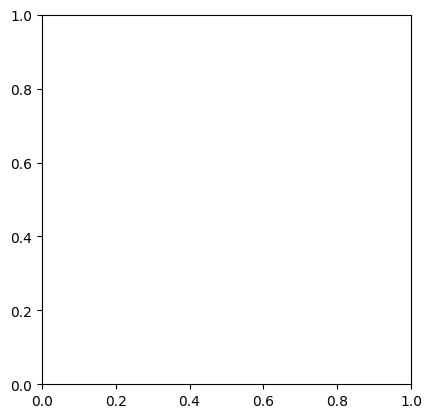

In [89]:
import matplotlib.pyplot as plt
plt.imshow(image_data_chan_first)

## Indexing

In [90]:
y

tensor([[11,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]])

In [94]:
y[0][2]

tensor(3)

## PyTorch tensors and NumPy

In [101]:
Tensor = torch.randn(size=(3, 4))
Tensor

tensor([[ 0.7011,  0.2567, -0.2483,  0.0843],
        [-0.0309,  0.0617, -1.3303,  0.7363],
        [-2.3714, -0.3278,  2.5751, -1.7326]])

In [102]:
Tensor.numpy()

array([[ 0.70105165,  0.25667247, -0.24826498,  0.08430596],
       [-0.03087811,  0.06167096, -1.3302999 ,  0.73630804],
       [-2.3713825 , -0.3277639 ,  2.575113  , -1.7325969 ]],
      dtype=float32)

In [113]:
import numpy as np
arr = np.array([1, 2, 3])
arr.dtype

dtype('int64')

In [111]:
torch.from_numpy(arr).dtype

torch.int64

## Reproducibility

Random weights -> go over training data -> update weights -> go over training data -> update weights ->

In [115]:
torch.manual_seed(42)
t1 = torch.randn(size=(3, 4))

torch.manual_seed(42)
t2 = torch.randn(size=(3, 4))

t1 == t2

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

## Running tensors on GPUs

In [117]:
x = torch.tensor(data=[1, 2, 3],
             dtype=torch.float16,
             device=device,
             requires_grad=True)

In [118]:
x.device

device(type='cuda', index=0)

## 3 Most common errors in deep learning with PyTorch

1. Shape errors
2. Device errors
3. Datatype errors